# **Assignment 4**
# Srujana Vanka - 2020102005

In [8]:
# Importing librabies
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import os
import json
%matplotlib inline
from google.colab.patches import cv2_imshow 
import math
import random
import sortedcontainers
import copy
import time
import sys
sys.setrecursionlimit(100000) 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
%cd /content/drive/MyDrive/DIP/images
%ls

/content/drive/MyDrive/DIP/images
book.jpg  test.raw


## Question 1

### Part 1

In [79]:
def degradation(img):
    image = np.copy(img)
    func = np.zeros(img.shape).astype(complex)
    h = img.shape[0]
    w = img.shape[1]

    # Construct image from blurring function
    for u in range(h):
        for v in range(w):
              a = 0.1
              b = 0.1
              T = 1
              C = math.pi*(a*(u-int(h/2))+b*(v-int(w/2)))

              if(C == 0):
                  func[u,v]=1

              else:
                  func[u,v] = ((T/C)*math.sin(C)*math.e**(-1j*C))
    
    output = img*func

    return output

### Part 2

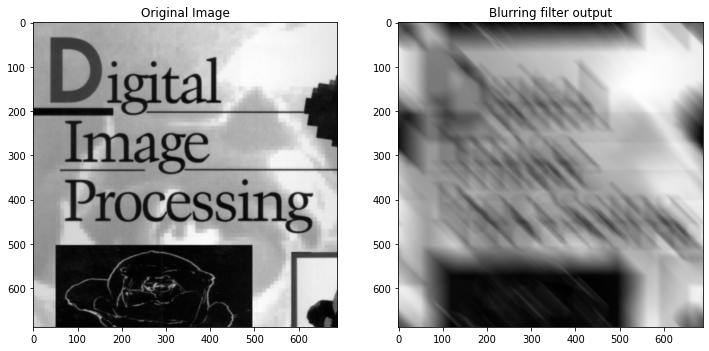

In [97]:
img = cv2.imread('book.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2D image
t_img = np.fft.fft2(gray_img)
t_img = np.fft.fftshift(t_img)

blurr = degradation(t_img)
out = np.fft.ifft2(np.fft.ifftshift(blurr))
out = np.abs(out)
out = out.astype(np.uint8)

# PLotting
plt.figure(figsize = (12,12))
plt.subplot(121)
plt.imshow(img,cmap="gray")
plt.title("Original Image")
plt.subplot(122)
plt.imshow(out,cmap="gray")
plt.title("Blurring filter output")
plt.show()


### Part 3

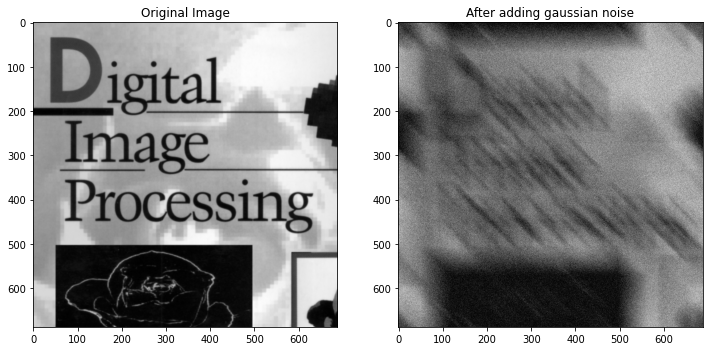

In [87]:
# Adding gaussian noise 
# u = 0, var = 650
gauss_noise = np.random.normal(0, np.sqrt(650), out.shape)
gn_img= out + gauss_noise
gn_img = np.abs(gn_img)

# PLotting
plt.figure(figsize = (12,12))
plt.subplot(121)
plt.imshow(img,cmap="gray")
plt.title("Original Image")
plt.subplot(122)
plt.imshow(gn_img,cmap="gray")
plt.title("After adding gaussian noise")
plt.show()

### Part 4

In [100]:
def inverseFilter(img):

    image = np.copy(img)
    func = np.zeros(img.shape).astype(complex)
    h = img.shape[0]
    w = img.shape[1]

    # Construct image from blurring function
    for u in range(h):
        for v in range(w):
              a = 0.1
              b = 0.1
              T = 1
              C = math.pi*(a*(u-int(h/2))+b*(v-int(w/2)))

              if(C == 0):
                  func[u,v]=1

              else:
                  func[u,v] = ((T/C)*math.sin(C)*math.e**(-1j*C))
    
    output = img/func
    inv_out = np.fft.ifft2(np.fft.ifftshift(output))
    
    return inv_out

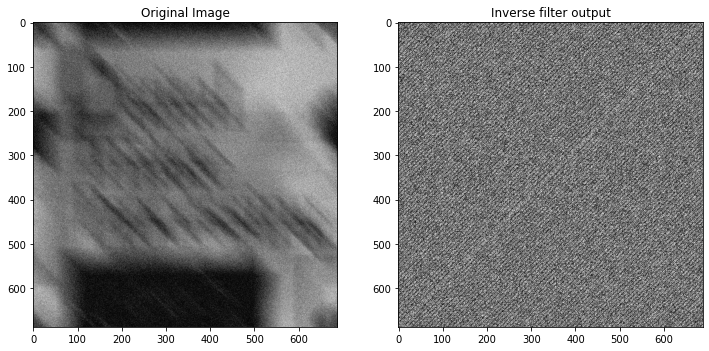

In [128]:
# 2D image
t_img = np.fft.fft2(gn_img)
t_img = np.fft.fftshift(t_img)

inv_out = inverseFilter(t_img)
inv_out = np.abs(inv_out)
inv_out = inv_out.astype(np.uint8)

# PLotting
plt.figure(figsize = (12,12))
plt.subplot(121)
plt.imshow(gn_img,cmap="gray")
plt.title("Original Image")
plt.subplot(122)
plt.imshow(inv_out,cmap="gray")
plt.title("Inverse filter output")
plt.show()

### Part 5

In [138]:
def wienerFilter(img,k):

    image = np.copy(img)
    func = np.zeros(img.shape).astype(complex)
    h = img.shape[0]
    w = img.shape[1]

    # Construct image from blurring function
    for u in range(h):
        for v in range(w):
              a = 0.1
              b = 0.1
              T = 1
              C = math.pi*(a*(u-int(h/2))+b*(v-int(w/2)))

              if(C == 0):
                  func[u,v]=1

              else:
                  func[u,v] = ((T/C)*math.sin(C)*math.e**(-1j*C))
  
    output = img*(np.conj(func)/(np.abs(func)*np.abs(func)+k))
    w_out = np.fft.ifft2(np.fft.ifftshift(output))
    return w_out

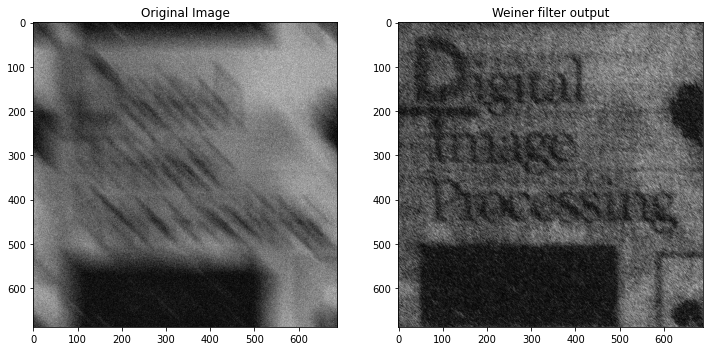

In [140]:
t_img = np.fft.fft2(gn_img)
t_img = np.fft.fftshift(t_img)
k=0.01
blur = wienerFilter(t_img,k)
w_out = np.abs(blur)

# PLotting
plt.figure(figsize = (12,12))
plt.subplot(121)
plt.imshow(gn_img,cmap="gray")
plt.title("Original Image")
plt.subplot(122)
plt.imshow(w_out,cmap="gray")
plt.title("Weiner filter output")
plt.show()

### Adding Gaussian noise of 0 mean and different variances to the blurred image

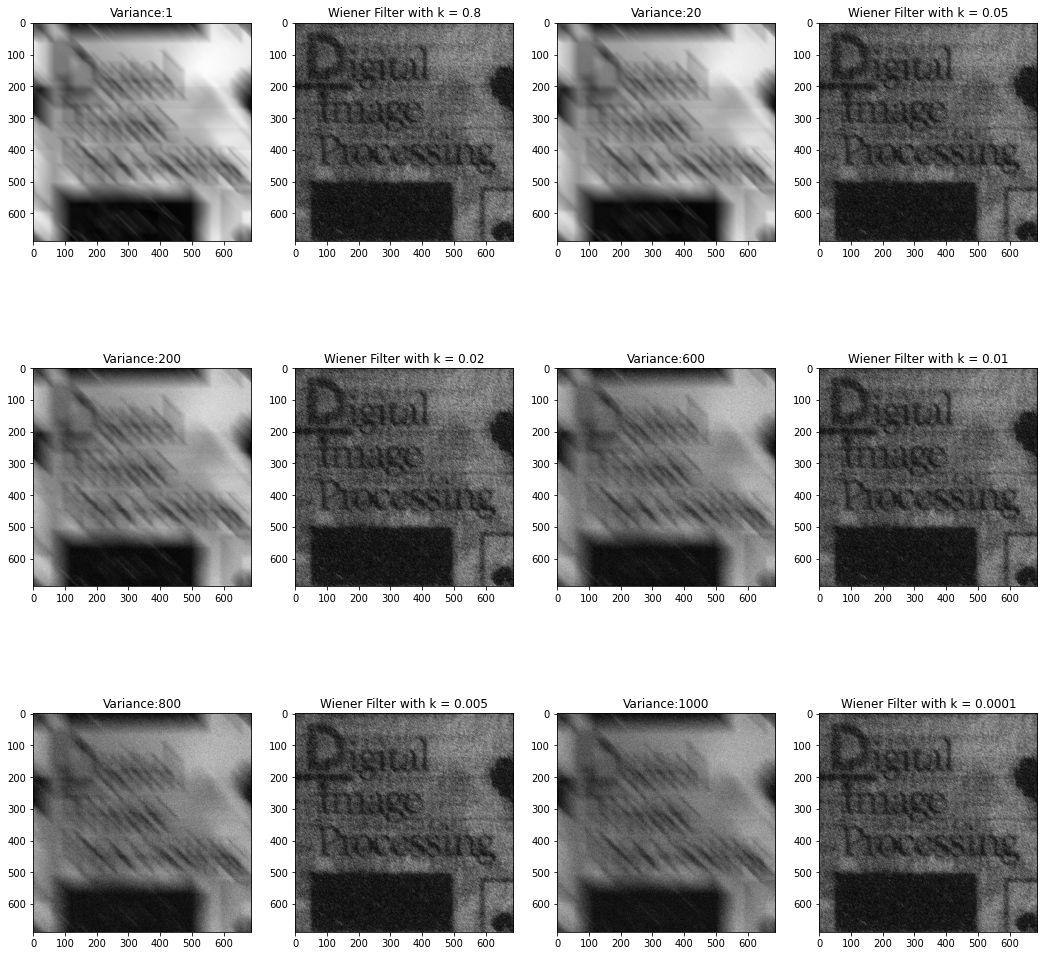

In [150]:
diffSig = [1, 20, 200, 600, 800, 1000]
k_arr = [0.8, 0.05, 0.02, 0.01, 0.005, 0.0001]

plt.figure(figsize=(18, 18))
n = 1

for x in range(len(diffSig)):
  gn = np.random.normal(0, np.sqrt(diffSig[x]), out.shape)
  gn = out + gn
  gn = np.abs(gn)

  # PLotting
  plt.subplot(3,4,n)
  plt.imshow(gn, cmap="gray")
  plt.title("Variance:"+str(diffSig[x]))
  n = n + 1

  unblured= wienerFilter(gn,k_arr[x])
  unb_out = np.abs(w_out)

  #PLotting
  plt.subplot(3,4,n)
  plt.imshow(unb_out, cmap="gray")
  plt.title("Wiener Filter with k = "+str(k_arr[x]))
  n=n+1
plt.show()


- It removes the additive gaussian noise that is added and unblurs the image. 
- Higher the variance, smaller the value of k required to restore back the image as much as possible. 

## Question 2

### Huffmann coding

In [ ]:
import heapq
import os

class HeapNode:
	def __init__(self, char, freq):
		self.char = char
		self.freq = freq
		self.left = None
		self.right = None

	def __cmp__(self, other):
		if(other == None):
			return -1
		if(not isinstance(other, HeapNode)):
			return -1
		return self.freq > other.freq


class HuffmanCoding:
	def __init__(self, path):
    # self.path = np.asarray(cv2.open(path),np.uint8)
		self.path = path
		self.heap = []
		self.codes = {}
		self.reverse_mapping = {}

	# functions for compression:

	def make_frequency_dict(self, text):
		frequency = {}
		for character in text:
			if not character in frequency:
				frequency[character] = 0
			frequency[character] += 1
		return frequency

	def make_heap(self, frequency):
		for key in frequency:
			node = HeapNode(key, frequency[key])
			heapq.heappush(self.heap, node)

	def merge_nodes(self):
		while(len(self.heap)>1):
			node1 = heapq.heappop(self.heap)
			node2 = heapq.heappop(self.heap)

			merged = HeapNode(None, node1.freq + node2.freq)
			merged.left = node1
			merged.right = node2

			heapq.heappush(self.heap, merged)


	def make_codes_helper(self, root, current_code):
		if(root == None):
			return

		if(root.char != None):
			self.codes[root.char] = current_code
			self.reverse_mapping[current_code] = root.char
			return

		self.make_codes_helper(root.left, current_code + "0")
		self.make_codes_helper(root.right, current_code + "1")


	def make_codes(self):
		root = heapq.heappop(self.heap)
		current_code = ""
		self.make_codes_helper(root, current_code)


	def get_encoded_text(self, text):
		encoded_text = ""
		for character in text:
			encoded_text += self.codes[character]
		return encoded_text


	def pad_encoded_text(self, encoded_text):
		extra_padding = 8 - len(encoded_text) % 8
		for i in range(extra_padding):
			encoded_text += "0"

		padded_info = "{0:08b}".format(extra_padding)
		encoded_text = padded_info + encoded_text
		return encoded_text


	def get_byte_array(self, padded_encoded_text):
		if(len(padded_encoded_text) % 8 != 0):
			exit(0)

		b = bytearray()
		for i in range(0, len(padded_encoded_text), 8):
			byte = padded_encoded_text[i:i+8]
			b.append(int(byte, 2))
		return b


	def compress(self):
		filename, file_extension = os.path.splitext(self.path)
		output_path = filename + ".bin"

		with open(self.path, 'r+') as file, open(output_path, 'wb') as output:
			text = file.read()
			text = text.rstrip()

			frequency = self.make_frequency_dict(text)
			self.make_heap(frequency)
			self.merge_nodes()
			self.make_codes()

			encoded_text = self.get_encoded_text(text)
			padded_encoded_text = self.pad_encoded_text(encoded_text)

			b = self.get_byte_array(padded_encoded_text)
			output.write(bytes(b))

		print("Compressed")
		return output_path

In [ ]:
#input file path
path = cv2.open(os.path.join("test.raw"))
h = HuffmanCoding(path)
output_path = h.compress()